# <center> Практика. Статистические тесты в контексте EDA

## Постановка задачи

Оригинальный датасет: “Data Science Job Salaries” (kaggle.com)

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе анализа вы должны ответить на ключевые вопросы HR-агентства:

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Какие факторы влияют на зарплату у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
  - для одной выборки;
  - для двух выборок;
  - для нескольких выборок;
- тест для категориальных признаков.

Данные содержат следующие столбцы:
НАИМЕНОВАНИЕ СТОЛБЦА	ОПИСАНИЕ
- work_year -	Год, в котором была выплачена зарплата.
- experience_level -	Опыт работы на этой должности в течение года со следующими возможными значениями:
  - EN — Entry-level/Junior;
  - MI — Mid-level/Intermediate;
  - SE — Senior-level/Expert;
  - EX — Executive-level/Director.
- employment_type	Тип трудоустройства для этой роли:
  - PT — неполный рабочий день;
  - FT — полный рабочий день;
  - CT — контракт;
  - FL — фриланс.
- job_title	- Роль, в которой соискатель работал в течение года.
- salary	- Общая выплаченная валовая сумма заработной платы.
- salary_currency	- Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- salary_in_usd	- Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- employee_residence	- Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
- remote_ratio	- Общий объём работы, выполняемой удалённо. Возможные значения:
  - 0 — удалённой работы нет (менее 20 %);
  - 50 — частично удалённая работа;
  - 100 — полностью удалённая работа (более 80 %).
- company_location	- Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
- company_size	- Среднее количество людей, работавших в компании в течение года:
  - S — менее 50 сотрудников (небольшая компания);
  - M — от 50 до 250 сотрудников (средняя компания);
  - L — более 250 сотрудников (крупная компания).



## Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [2]:
# загружаем датасет
data = pd.read_csv('https://lms-cdn.skillfactory.ru/assets/courseware/v1/9e84f30c5bc84881a5e33262d5e32a8b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ds_salaries.zip')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений).

employee_residence,salary_currency,salary,company_location - перечень признаков определенные как неинформативные признаки

Проверим данные на наличие полных дубликатов:

In [5]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


выведим основные статистические характеристики для каждого из признаков.

In [6]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### Разведывательный анализ данных

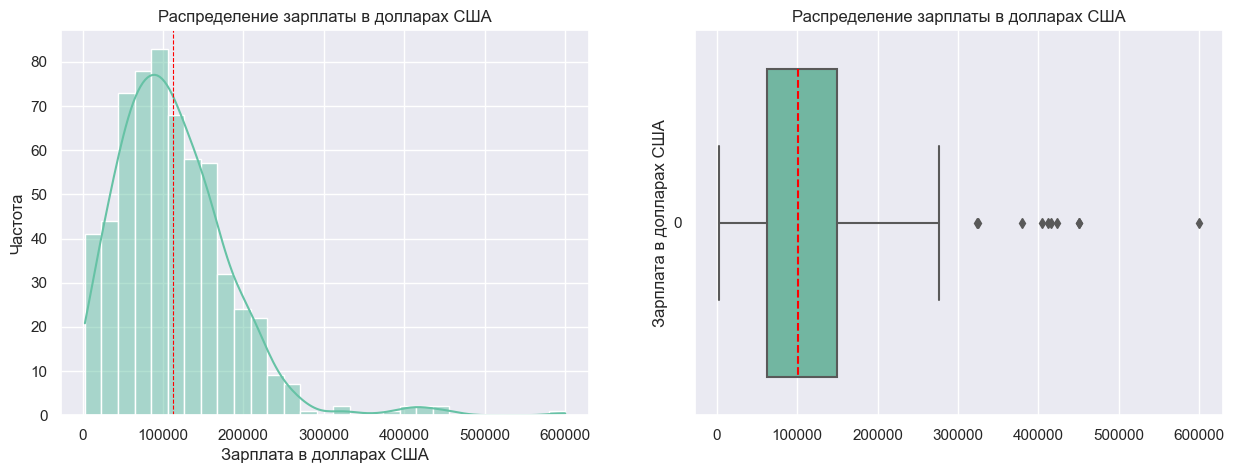

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Зарплата в долларах США', ylabel='Частота')
axes[0].set_title('Распределение зарплаты в долларах США')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Зарплата в долларах США')
axes[1].set_title('Распределение зарплаты в долларах США')

plt.show()

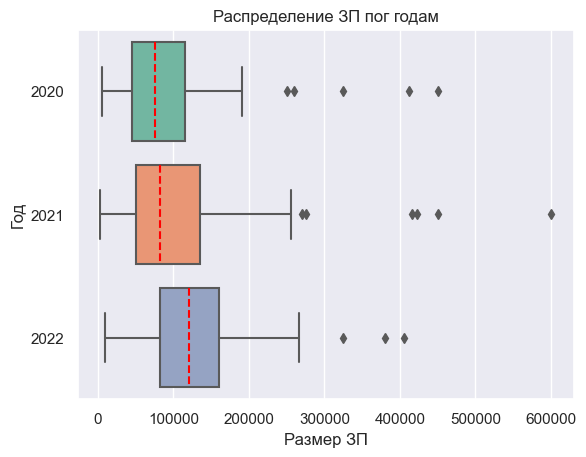

In [8]:
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Год')
plt.title('Распределение ЗП пог годам')
plt.show()

In [9]:
data_agg = data.groupby('work_year')['salary_in_usd'].agg('describe').sort_values('work_year',ascending=True)
data_agg


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.000000,82831.799222,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.792627,80225.106319,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.006289,58183.647585,10000.0,81666.0,120000.0,160000.0,405000.0


Размер ЗП увеличивается от года к году

### Какие факторы влияют на зарплату у специалистов Data Scientist?

In [10]:
melb_df['StreetType'] = stret_types.apply(lambda x: x if x in poplar_types else 'other')

fig = px.imshow(
    data_ds.corr(),
    text_auto=True
)
fig.show()

NameError: name 'stret_types' is not defined

In [ ]:
ax = sns.boxplot(data, x='charges', y='sex', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер страховых выплат', ylabel='Пол')
plt.title('Распределение страховых выплат по полу')
plt.show()

ValueError: Could not interpret input 'charges'

In [ ]:
data_agg = data.groupby('sex')['charges'].describe().round(2)
print('Страховые выплаты в зависимости от пола')
data_agg

Страховые выплаты в зависимости от пола


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.58,11128.70,1607.51,4885.16,9412.96,14454.69,63770.43
male,675.0,13975.00,12971.96,1121.87,4654.02,9377.90,19006.69,62592.87


На первый взгляд распределения страховых выплат для разных полов различны. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

### Страховые выплаты в зависимости от того, курит ли клиент.

In [ ]:
ax = sns.boxplot(data, x='charges', y='smoker', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер страховых выплат', ylabel='Курение')
plt.title('Распределение страховых выплат по курению')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
data_agg = data.groupby('smoker')['charges'].describe().round(2)
print('Страховые выплаты в зависимости от курения')
data_agg

Страховые выплаты в зависимости от курения


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.66,5992.97,1121.87,3988.88,7345.73,11363.02,36910.61
yes,274.0,32050.23,11541.55,12829.46,20826.24,34456.35,41019.21,63770.43


Распределения страховых выплат различны в зависимости от того, курит ли клиент. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Страховые выплаты в зависимости от региона

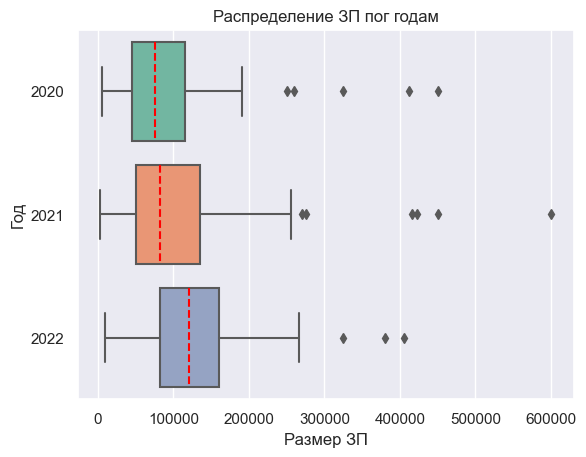

In [ ]:
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Год')
plt.title('Распределение ЗП пог годам')
plt.show()

In [ ]:
data_agg = data.groupby('region')['charges'].describe().round(2)
print('Страховые выплаты в зависимости от региона')
data_agg

KeyError: 'region'

Распределения страховых выплат различны для разных регионов. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Соотношение курящих среди мужчин и женщин

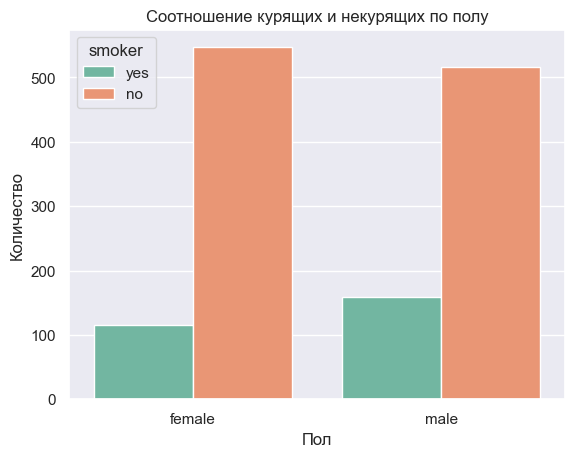

In [ ]:
ax = sns.countplot(data=data, x=data['sex'], hue='smoker')
ax.set(xlabel='Пол', ylabel='Количество')
plt.title('Соотношение курящих и некурящих по полу')
plt.show()

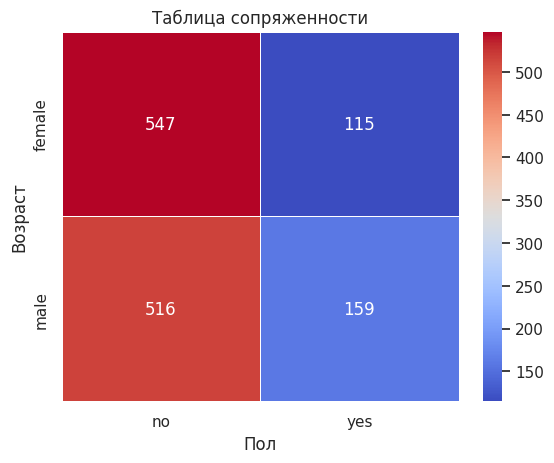

In [ ]:
cross_tab = pd.crosstab(index=data['sex'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Пол', ylabel='Возраст')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным, среди курящих мужчин больше, чем женщин. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных



In [ ]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплат не изменяется от года к году. ЗП в 2020 = μ_1, ЗП в 2021 μ_2, ЗП в 2022 μ_3 

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* ($H_1$): размер зарплат не изменяется от года к году ($μ_1$) статистически больше, чем размер страховых выплат клиентов-женщин ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

In [ ]:
data['work_year'].value_counts()           

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [ ]:
# значения страховых выплат
salary_in_2020 = data.loc[data['work_year']== 2020 , 'salary_in_usd']
salary_in_2021 = data.loc[data['work_year']== 2021 , 'salary_in_usd']
salary_in_2022 = data.loc[data['work_year']== 2022 , 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('для ЗП в 2020')
result = stats.shapiro(salary_in_2020)
decision_normality(result[1])

print('для ЗП в 2021')
result = stats.shapiro(salary_in_2021)
decision_normality(result[1])

print('для ЗП в 2022')
result = stats.shapiro(salary_in_2022)
decision_normality(result[1])

для ЗП в 2020
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
для ЗП в 2021
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
для ЗП в 2022
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? —  более двух.
* Группы зависимы? — да.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать критерий Фридмана 

**Проведём тест**

In [ ]:
salary_in_2020_l= list(salary_in_2020)[:72]
salary_in_2021_l= list(salary_in_2021)[:72]
salary_in_2022_l= list(salary_in_2022)[:72]
# проводим тест
_, p = stats.friedmanchisquare(salary_in_2020_l, salary_in_2021_l, salary_in_2022_l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Нет оснований утверждать, что размер ЗП не изменяется от года к году.

### Какие факторы влияют на зарплату у специалистов Data Scientist?


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер страховых выплат для некурящих клиентов ($μ_1$) статистически больше либо равен размеру страховых выплат для курящих клиентов ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер страховых выплат для некурящих клиентов ($μ_1$) статистически меньше, чем размер страховых выплат для курящих клиентов ($μ_2$).
$$ H_1 : μ_1 < μ_2$$




In [ ]:
data_scient = 

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [ ]:
# значения страховых выплат
charges_no_smoker = data.loc[data['smoker']=='no', 'charges']
charges_smoker = data.loc[data['smoker']=='yes', 'charges']

# проводим тест Шапиро-Уилка
print('Для некурящих клиентов:')
result = stats.shapiro(charges_no_smoker)
decision_normality(result[1])

print('Для курящих клиентов:')
result = stats.shapiro(charges_smoker)
decision_normality(result[1])

KeyError: 'smoker'

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер страховых выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**


In [ ]:
# проводим тест
_, p = stats.mannwhitneyu(charges_no_smoker, charges_smoker, alternative='less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер страховых выплат для некурящих клиентов меньше, чем для курящих.

### Влияет ли регион проживания на размер выплат?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер страховых выплат не отличается в разных регионах: северо-восток ($μ_1$), юго-восток ($μ_2$), юго-запад ($μ_3$), северо-запад ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза*: размер страховых выплат отличается в разных регионах: северо-восток ($μ_1$), юго-восток ($μ_2$), юго-запад ($μ_3$), северо-запад ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [ ]:
# значения страховых выплат
charges_northeast = data.loc[data['region']=='northeast', 'charges']
charges_southeast = data.loc[data['region']=='southeast', 'charges']
charges_northwest = data.loc[data['region']=='northwest', 'charges']
charges_southwest = data.loc[data['region']=='southwest', 'charges']

# проводим тест Шапиро-Уилка
print('Для северо-востока:')
result = stats.shapiro(charges_northeast)
decision_normality(result[1])

print('Для юго-востока:')
result = stats.shapiro(charges_southeast)
decision_normality(result[1])

print('Для северо-запада:')
result = stats.shapiro(charges_northwest)
decision_normality(result[1])

print('Для юго-запада:')
result = stats.shapiro(charges_southwest)
decision_normality(result[1])


Для северо-востока:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для юго-востока:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для северо-запада:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для юго-запада:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Регион проживания в США»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [ ]:
# проводим тест
_, p = stats.kruskal(charges_northeast, charges_southeast, charges_southwest, charges_northwest)
decision_hypothesis(p)

p-value = 0.202
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что есть разница в размере страховых выплат в разных регионах.

### Есть ли взаимосвязь между курением и полом?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между тем, курит человек или нет, и его полом нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между тем, курит человек или нет, и его полом есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Пол»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(data['sex'], data['smoker'])

cross_table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.006
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между полом и курением.

## Итоговые результаты исследования

*   Нет оснований утверждать, что есть разница в размере страховых выплат для клиентов-мужчин и клиентов-женщин.
*   Размер страховых выплат для некурящих клиентов меньше, чем для курящих.
*   Нет оснований утверждать, что есть разница в размере страховых выплат для разных регионов.
*   Существует взаимосвязь между полом и курением.